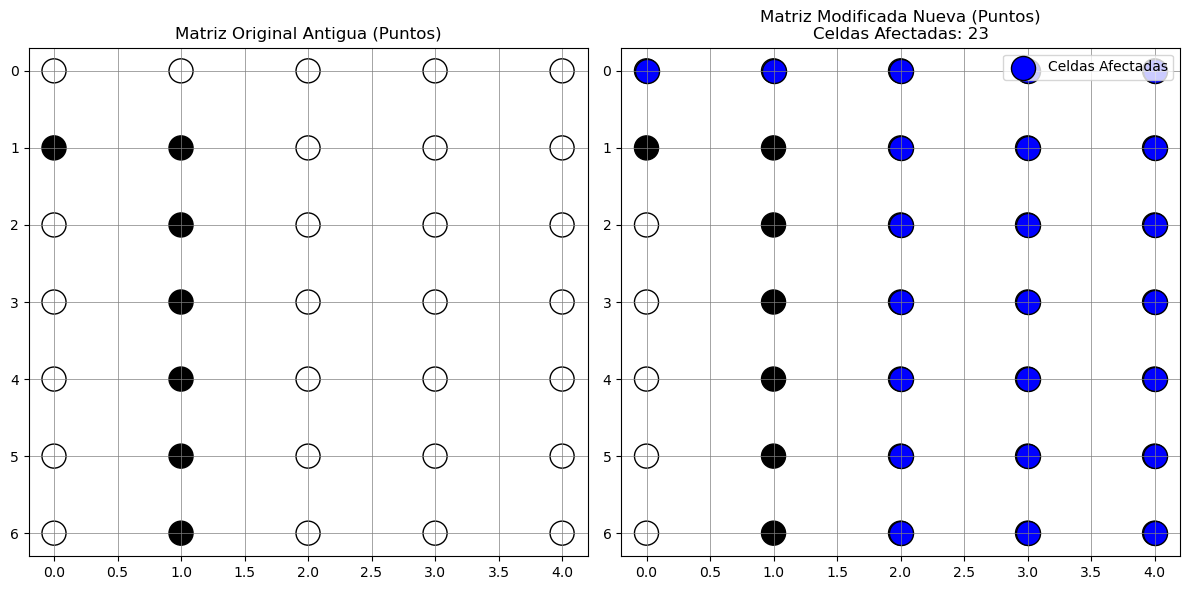

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Función de Flood Fill
def flood_fill_modified(matrix, start, new_color):
    rows, cols = matrix.shape
    x, y = start
    original_color = matrix[x, y]
    
    if original_color == new_color:
        return matrix, []

    queue = deque([start])
    affected_cells = []

    while queue:
        cx, cy = queue.popleft()

        if 0 <= cx < rows and 0 <= cy < cols and matrix[cx, cy] == original_color:
            matrix[cx, cy] = new_color
            affected_cells.append((cx, cy))

            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                queue.append((cx + dx, cy + dy))

    return matrix, affected_cells

# Función para graficar las matrices
def plot_matrices_as_points(matrix_original, matrix_modified, affected_cells, title_before="Matriz Original Antigua", title_after="Matriz Modificada Nueva"):
    rows, cols = matrix_original.shape

    def map_color(value):
        if value == 255:
            return "white"  # Color para los valores 255
        elif value == 0:
            return "black"  # Color para los valores 0
        else:
            return "gray"   # Color para otros valores

    # Procesar la matriz original
    x_points_orig, y_points_orig, colors_orig = [], [], []
    for i in range(rows):
        for j in range(cols):
            x_points_orig.append(j)
            y_points_orig.append(i)
            colors_orig.append(map_color(matrix_original[i, j]))

    # Procesar la matriz modificada
    x_points_mod, y_points_mod, colors_mod = [], [], []
    for i in range(rows):
        for j in range(cols):
            x_points_mod.append(j)
            y_points_mod.append(i)
            colors_mod.append(map_color(matrix_modified[i, j]))

    # Crear subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Matriz original
    axes[0].scatter(x_points_orig, y_points_orig, c=colors_orig, s=300, edgecolors="black")
    axes[0].invert_yaxis()
    axes[0].set_title(title_before)
    axes[0].grid(visible=True, color="gray", linewidth=0.5)

    # Matriz modificada
    axes[1].scatter(x_points_mod, y_points_mod, c=colors_mod, s=300, edgecolors="black")
    if affected_cells:
        hx, hy = zip(*affected_cells)  # Coordenadas de las celdas afectadas
        axes[1].scatter(hy, hx, color="blue", s=300, edgecolors="black", label="Celdas Afectadas")  
        axes[1].legend(loc="upper right")  # Agregar leyenda
    axes[1].invert_yaxis()
    axes[1].set_title(f"{title_after}\nCeldas Afectadas: {len(affected_cells)}")  # Añadir conteo de celdas
    axes[1].grid(visible=True, color="gray", linewidth=0.5)

    plt.tight_layout()
    plt.show()

# Pedir datos al usuario
startfila = int(input("Dame la posición de la fila (índice empieza en 0): "))
startcolumna = int(input("Dame la posición de la columna (índice empieza en 0): "))
new_color = int(input("Dame el nuevo color (entero entre 0 y 255): "))
start = (startfila, startcolumna)

# Matriz inicial
matrix = np.array([
    [255, 255, 255, 255, 255],
    [0, 0,   255,   255, 255],
    [255, 0,   255, 255,   255],
    [255, 0, 255,   255,   255],
    [255, 0, 255, 255, 255],
    [255, 0,   255, 255,   255],
    [255, 0, 255, 255, 255]
], dtype=np.uint8)

# Aplicar flood fill
matrix_modified, affected_cells = flood_fill_modified(matrix.copy(), start, new_color)

# Mostrar los resultados
plot_matrices_as_points(matrix, matrix_modified, affected_cells, 
                        title_before="Matriz Original Antigua (Puntos)", 
                        title_after="Matriz Modificada Nueva (Puntos)")
